![LGVIP](https://miro.medium.com/max/1400/1*-Sl1qQYRmmhI3X4c6DzI-w.png)

## <p style = 'text-align:center;'> Lets Grow More Virtual Internship Program for May 2022 Batch </p>

### <p style = 'text-align:center;'> Author: Shreya Nadkarni </p>

 *   Intermediate Level
 *  Task 1 : Exploratory Data Analysis on Dataset - Terrorism 

* Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

- Importing Dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('Terrorism Dataset.csv', encoding = 'latin1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
rows, cols = data.shape
print(f'Total Rows in the given dataset are: {rows}','and', f'Total Columns in the given dataset are: {cols}')

Total Rows in the given dataset are: 181691 and Total Columns in the given dataset are: 135


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


- ### Cleaning the Data

In [5]:
df = data[['iyear', 'imonth', 'iday','country','country_txt', 'region', 'region_txt', 'provstate', 'city', 
           'latitude', 'longitude','attacktype1_txt','targtype1_txt','gname',
          'weaptype1_txt', 'weapsubtype1','nkill','nwound']]
df.head(2)

,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,weapsubtype1,nkill,nwound
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,Unknown,NaN,1.0,0.0
1,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,NaN,0.0,0.0


In [6]:

df.rename(columns={"iyear":'Year',"imonth":'Month',"iday":'Day',"country":'Country_attacks',"country_txt":'Country_names',
                  "region":'Region_attacks',"region_txt":'Region_names',"provstate":'State',"attacktype1_txt":'Attack_type',
                  "targtype1_txt":'Target_type',"gname":'Group_name',"weaptype1_txt":
                  'Weapon_type','weapsubtype1':'Weapon_subtype','weapdetail':'Weapon_detail','nkill':'killed',
                   'nwound':'wounded'},inplace=True)
df['killed']=df['killed'].fillna(0).astype(int)
df['wounded']=df['wounded'].fillna(0).astype(int)
df['Casualty'] = df['killed'] + df['wounded']

df.head()

,Year,Month,Day,Country_attacks,Country_names,Region_attacks,Region_names,State,city,latitude,longitude,Attack_type,Target_type,Group_name,Weapon_type,Weapon_subtype,killed,wounded,Casualty
0,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,Unknown,NaN,1,0,1
1,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,NaN,0,0,0
2,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,Unknown,NaN,1,0,1
3,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,16.0,0,0,0
4,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,0,0,0


In [7]:
df.shape

(181691, 19)

In [8]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country_attacks        0
Country_names          0
Region_attacks         0
Region_names           0
State                421
city                 434
latitude            4556
longitude           4557
Attack_type            0
Target_type            0
Group_name             0
Weapon_type            0
Weapon_subtype     20768
killed                 0
wounded                0
Casualty               0
dtype: int64

In [9]:
df.dropna(axis=0, inplace=True)

In [10]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country_attacks    0
Country_names      0
Region_attacks     0
Region_names       0
State              0
city               0
latitude           0
longitude          0
Attack_type        0
Target_type        0
Group_name         0
Weapon_type        0
Weapon_subtype     0
killed             0
wounded            0
Casualty           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156706 entries, 3 to 181690
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Year             156706 non-null  int64  
 1   Month            156706 non-null  int64  
 2   Day              156706 non-null  int64  
 3   Country_attacks  156706 non-null  int64  
 4   Country_names    156706 non-null  object 
 5   Region_attacks   156706 non-null  int64  
 6   Region_names     156706 non-null  object 
 7   State            156706 non-null  object 
 8   city             156706 non-null  object 
 9   latitude         156706 non-null  float64
 10  longitude        156706 non-null  float64
 11  Attack_type      156706 non-null  object 
 12  Target_type      156706 non-null  object 
 13  Group_name       156706 non-null  object 
 14  Weapon_type      156706 non-null  object 
 15  Weapon_subtype   156706 non-null  float64
 16  killed           156706 non-null  int3

- ### Data Profiling

In [12]:
import dabl
df_clean = dabl.clean(df,target_col='Country_attacks', verbose=1)
#types = dabl.detect_types(df_clean)
#types

Detected feature types:
continuous      2
dirty_float     0
low_card_int    9
categorical     5
date            0
free_string     3
useless         0
dtype: int64


* ### Data Analysis and Visualization

In [13]:
df.describe(include = ['int64','float64'])

,Year,Month,Day,Country_attacks,Region_attacks,latitude,longitude,Weapon_subtype
count,156706.000000,156706.000000,156706.000000,156706.000000,156706.000000,156706.000000,1.567060e+05,156706.000000
mean,2003.446473,6.456830,15.533834,132.511340,7.229602,23.723357,-5.211239e+02,11.191550
std,13.013171,3.386328,8.800710,112.121442,2.894288,18.373163,2.177176e+05,6.473538
min,1970.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000
25%,1991.000000,4.000000,8.000000,83.000000,6.000000,11.840929,6.864368e+00,5.000000
50%,2010.000000,6.000000,15.000000,98.000000,8.000000,31.551514,4.362736e+01,12.000000
75%,2014.000000,9.000000,23.000000,160.000000,10.000000,34.554727,6.888055e+01,16.000000
max,2017.000000,12.000000,31.000000,1004.000000,12.000000,74.633553,1.784419e+02,31.000000


In [14]:
pd.DataFrame(df.describe(include = 'object'))

,Country_names,Region_names,State,city,Attack_type,Target_type,Group_name,Weapon_type
count,156706,156706,156706,156706,156706,156706,156706,156706
unique,201,12,2687,31905,9,22,2985,6
top,Iraq,Middle East & North Africa,Baghdad,Baghdad,Bombing/Explosion,Private Citizens & Property,Unknown,Explosives
freq,23253,45377,7601,7545,86145,37341,74908,90742


In [15]:
a =  df['Year'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attacks'})
a

,Year,Attacks
0,1970,565
1,1971,399
2,1972,517
3,1973,374
4,1974,497
5,1975,624
6,1976,718
7,1977,958
8,1978,1117
9,1979,1899


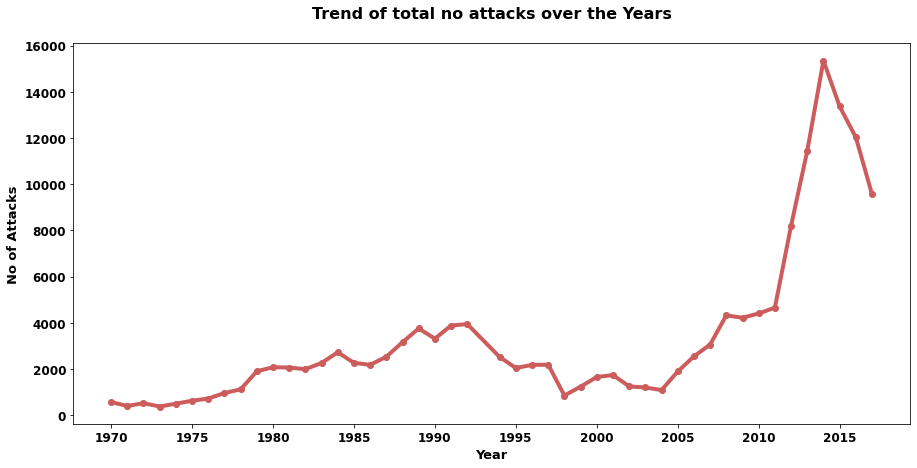

In [16]:
plt.figure(figsize=(15, 7))
x=a['Year']
y = a['Attacks']
plt.plot(x,y,marker="o", color="indianred",linewidth=4)
plt.xlabel('Year',fontsize=13, fontweight='bold')
plt.xticks(rotation=0,fontsize=12, fontweight='bold')
plt.locator_params('x', nbins=20)
plt.ylabel('No of Attacks',fontsize=13, fontweight='bold')
plt.yticks(rotation=0,fontsize=12, fontweight='bold')
plt.title('Trend of total no attacks over the Years', fontsize=16, fontweight='bold', pad=25)
plt.show()

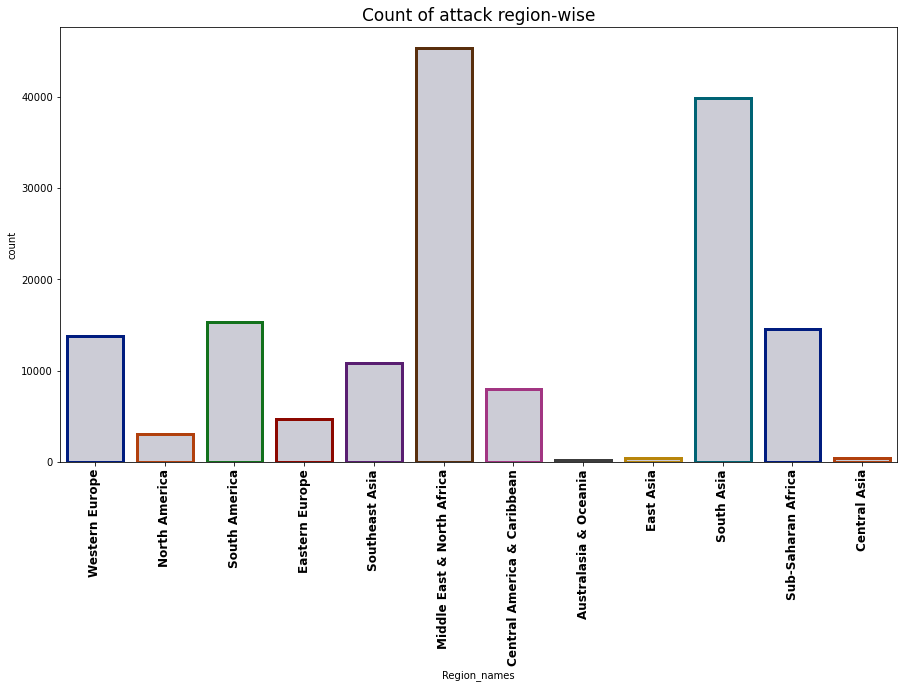

In [19]:
plt.figure(figsize=(15,8));
sns.countplot(x='Region_names',data=df,
             facecolor=(0,0,0.2,0.2),linewidth=3.0,
             edgecolor=sns.color_palette("dark",12)).set_title("Count of attack region-wise", fontsize=17);
plt.xticks(rotation=90,fontsize=12, fontweight='bold');


In [20]:
pd.crosstab(df['Year'],df['Region_names']).style.background_gradient(cmap='pink')

Region_names,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,1,0,0,9,19,464,31,0,5,0,35
1971,1,3,0,1,1,40,223,13,0,5,0,112
1972,2,3,0,0,0,46,64,20,1,16,4,361
1973,0,2,0,0,1,16,58,42,0,1,3,251
1974,0,8,0,1,1,39,100,59,2,1,4,282
1975,0,9,0,9,0,39,150,45,4,3,7,358
1976,0,38,0,1,0,47,114,73,3,4,6,432
1977,0,16,0,4,2,202,118,74,2,7,14,519
1978,2,134,0,12,2,105,97,156,2,30,28,549


In [21]:
pd.crosstab(df['Attack_type'],df['Region_names']).style.background_gradient()

Region_names,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Attack_type,,,,,,,,,,,,
Armed Assault,42,3665,110,76,1247,8822,424,3186,10821,3590,5742,1414
Assassination,25,1048,101,40,368,3750,226,2370,3840,1221,1459,2762
Bombing/Explosion,67,2854,225,313,2706,30506,1522,8696,20985,4603,5423,8245
Facility/Infrastructure Attack,42,109,18,29,192,671,738,326,1718,784,569,1110
Hijacking,0,14,4,8,15,88,9,41,62,49,95,51
Hostage Taking (Barricade Incident),4,135,1,3,16,89,53,186,107,54,82,69
Hostage Taking (Kidnapping),7,125,24,3,107,1350,52,542,2095,494,1133,64
Unarmed Assault,5,15,4,10,51,100,22,24,280,12,55,89
Unknown,0,0,0,0,0,1,0,0,4,1,2,0


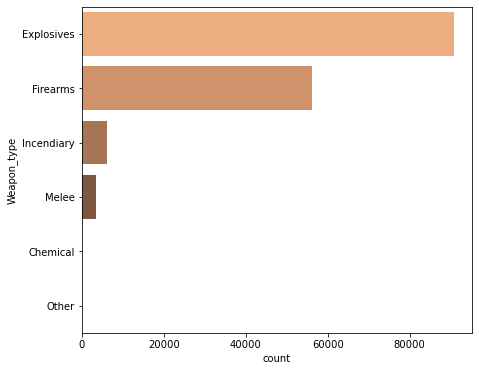

In [22]:
plt.figure(figsize=(7, 6))
sns.countplot(y='Weapon_type', data= df, palette="copper_r", order = df['Weapon_type'].value_counts()[:6].index);

In [23]:
pd.crosstab(df['Weapon_type'], df['Region_names']).style.background_gradient(cmap='YlOrRd')

Region_names,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Weapon_type,,,,,,,,,,,,
Chemical,6,0,1,2,4,54,12,7,51,3,3,2
Explosives,69,2801,245,319,3037,31928,1551,8832,22331,4843,6201,8585
Firearms,68,5074,214,35,1421,11528,671,6171,14908,5141,7291,3631
Incendiary,39,27,14,49,150,703,740,238,1651,683,617,1250
Melee,9,63,13,77,90,1164,72,123,971,138,448,336
Other,1,0,0,0,0,0,0,0,0,0,0,0


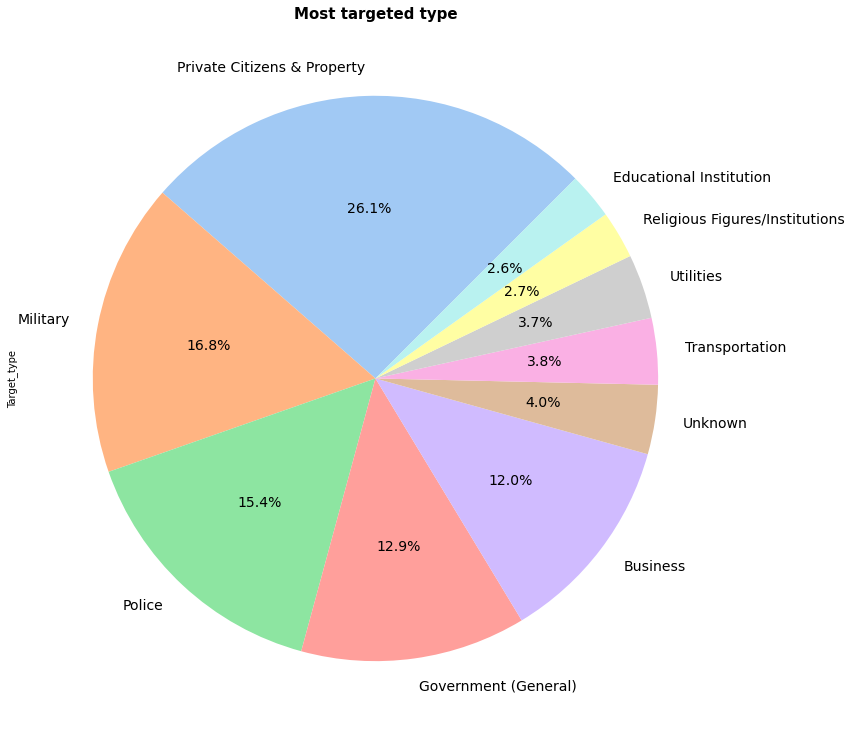

In [32]:
plt.figure(figsize=(20,13))
colors = sns.color_palette('pastel')
p = df['Target_type'].value_counts()[:10].plot(kind='pie',autopct='%1.1f%%',startangle=45,
                                               textprops={'color':'black', 'fontsize':14},colors=colors)
plt.title('Most targeted type',fontsize=15,
         color='black', fontweight='bold');
#plt.pie(p, startangle=45,autopct='%1.1f%%',
       #textprops={'color':'black', 'fontsize':14}, colors=colors);

In [27]:
#df[['Year','killed']].groupby['Year'].sum()

frame = pd.DataFrame()
frame ['Total_Killed'] = df.groupby(['Year']).sum()['killed']
frame ['Total_wounded'] = df.groupby(['Year']).sum()['wounded']
frame ['Toatl_Casualty'] = df.groupby(['Year']).sum()['Casualty']
frame

,Total_Killed,Total_wounded,Toatl_Casualty
Year,,,
1970,105,179,284
1971,164,79,243
1972,528,399,927
1973,358,492,850
1974,515,848,1363
1975,607,610,1217
1976,615,683,1298
1977,305,493,798
1978,842,1477,2319


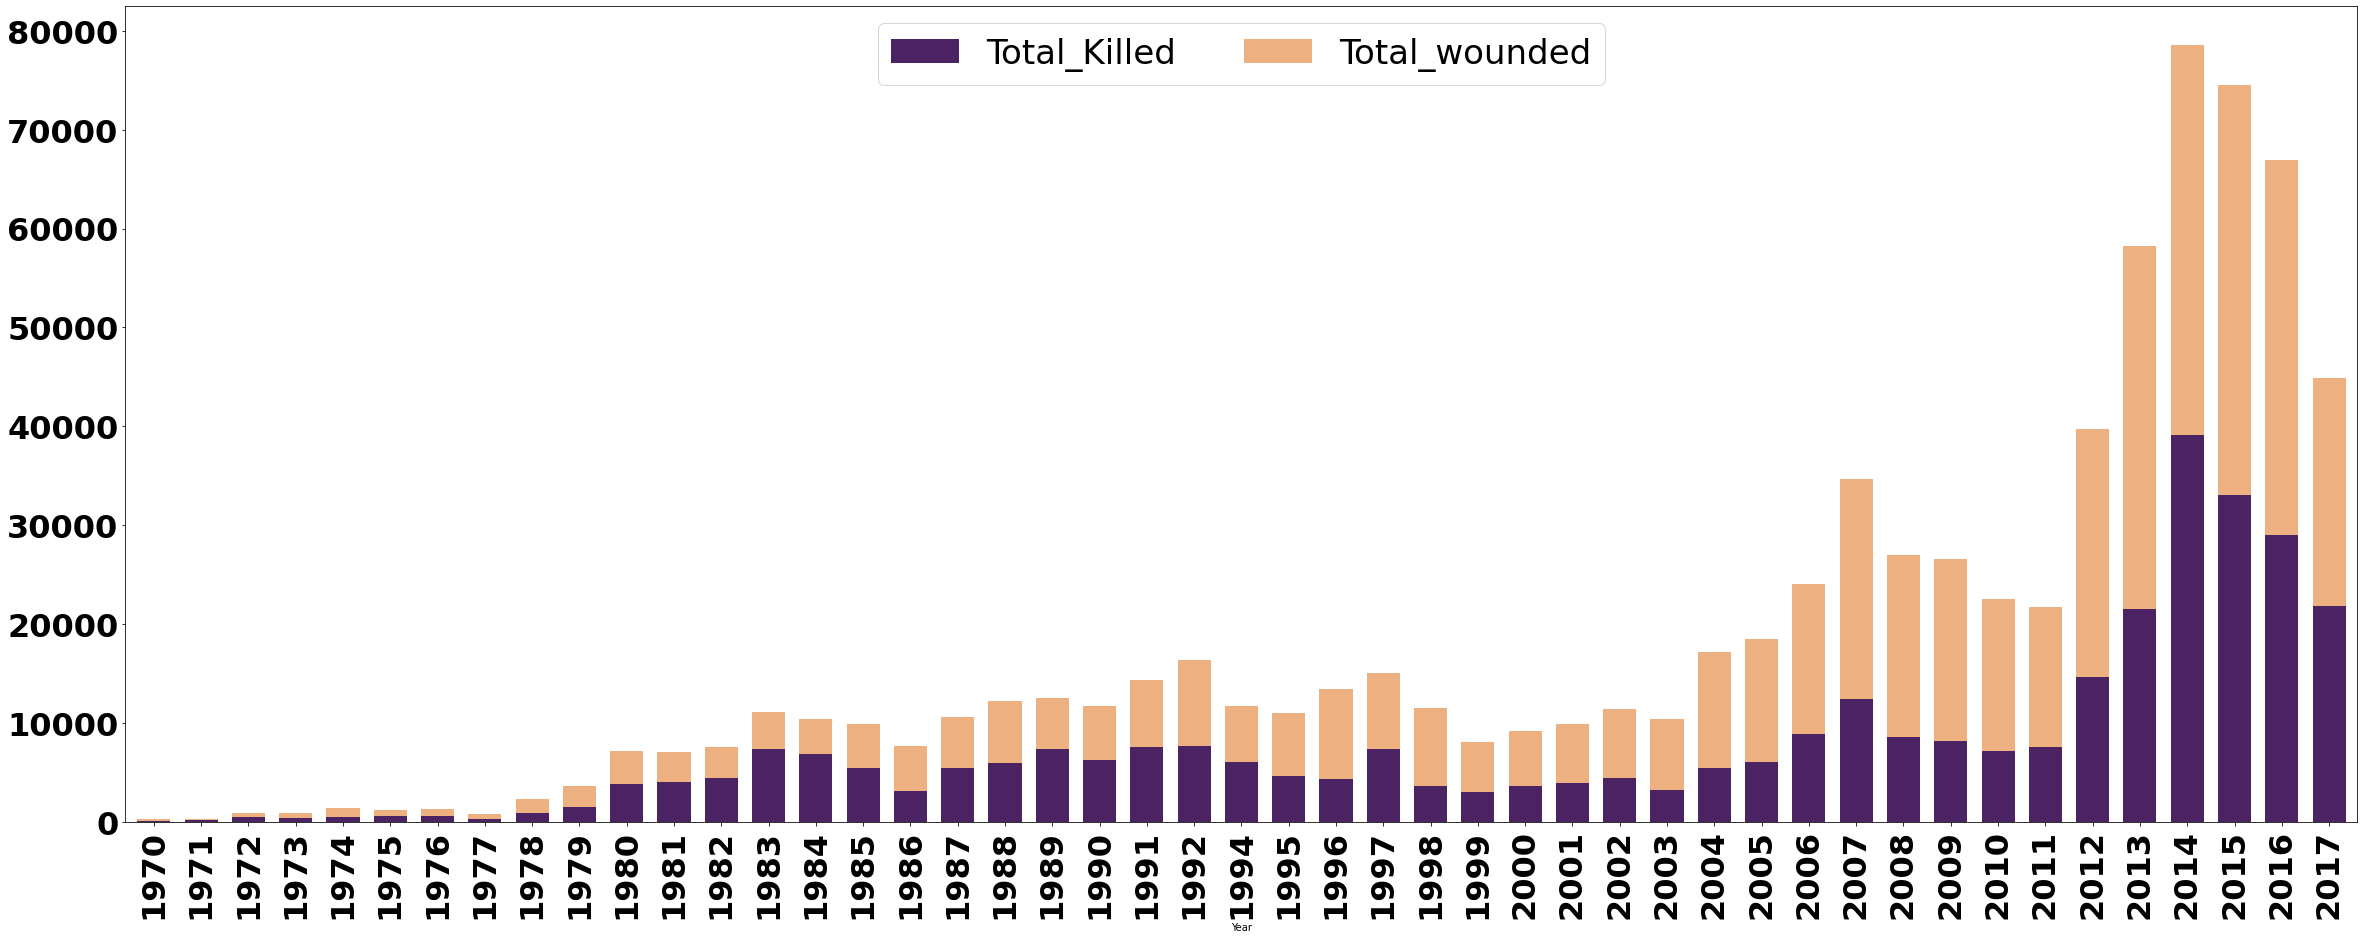

In [26]:
frame.plot(kind='bar', 
                    stacked=True, 
                    colormap='flare_r', 
                    figsize=(40, 15),width=0.7)

plt.legend(loc="upper center", ncol=2, fontsize=34)
plt.xticks(rotation=90,fontsize=32, fontweight='bold');
plt.yticks(rotation=0,fontsize=32, fontweight='bold');

### Conclusions

* #### The country with the most attacks:  Iraq
* #### The region with the most attacks:  Middle East & North Africa
* #### The city with the most attacks:  Baghdad
* #### The most common attacks type:  Bombing/Explosion
* #### The target type with most attacks :  Private Citizens & Property
* #### The weapon used for most attacks:  Explosives
* #### The year with the most attacks:  2014
* #### Trend chart shows that the total no terrorist attacks periodically increased over the Years